In [ ]:
import pandas as pd
import numpy as np

data = 'https://raw.githubusercontent.com/mramputatoes/project_1/main/pokemon.csv'
df = pd.read_csv(data)

df.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
df.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,0.50,2.0,0.5,0.5,0.0,0.5,0.5,1.0,1.0,95,30720,0,600,3,Artificial Pokémon,115,1250000,1.0,80,Magearnaマギアナ,Magearna,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [ ]:
df = df.drop(columns= ['abilities','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight','against_fire','against_flying','against_ghost','against_grass','against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel','against_water', ], axis = 1)
df.head()

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
df = df[['pokedex_number','name', 'classfication', 'type1', 'type2', 'base_total', 'attack', 'defense', 'hp', 'sp_attack', 'sp_defense','speed', 'height_m', 'weight_kg', 'base_happiness', 'base_egg_steps', 'experience_growth', 'capture_rate', 'generation', 'is_legendary' ]]
df.head()

,pokedex_number,name,classfication,type1,type2,base_total,attack,defense,hp,sp_attack,sp_defense,speed,height_m,weight_kg,base_happiness,base_egg_steps,experience_growth,capture_rate,generation,is_legendary
0,1,Bulbasaur,Seed Pokémon,grass,poison,318,49,49,45,65,65,45,0.7,6.9,70,5120,1059860,45,1,0
1,2,Ivysaur,Seed Pokémon,grass,poison,405,62,63,60,80,80,60,1.0,13.0,70,5120,1059860,45,1,0
2,3,Venusaur,Seed Pokémon,grass,poison,625,100,123,80,122,120,80,2.0,100.0,70,5120,1059860,45,1,0
3,4,Charmander,Lizard Pokémon,fire,NaN,309,52,43,39,60,50,65,0.6,8.5,70,5120,1059860,45,1,0
4,5,Charmeleon,Flame Pokémon,fire,NaN,405,64,58,58,80,65,80,1.1,19.0,70,5120,1059860,45,1,0


In [ ]:
#Minior = df[df['capture_rate'] == "30 (Meteorite)255 (Core)"]

#print(Minior)

df['capture_rate'][773] = 285/2

In [ ]:
df['capture_rate']= df['capture_rate'].astype(int)

In [ ]:
df[df['weight_kg'].isnull()]


,pokedex_number,name,classfication,type1,type2,base_total,attack,defense,hp,sp_attack,sp_defense,speed,height_m,weight_kg,base_happiness,base_egg_steps,experience_growth,capture_rate,generation,is_legendary
18,19,Rattata,Mouse Pokémon,normal,dark,253,56,35,30,25,35,72,NaN,NaN,70,3840,1000000,255,1,0
19,20,Raticate,Mouse Pokémon,normal,dark,413,71,70,75,40,80,77,NaN,NaN,70,3840,1000000,127,1,0
25,26,Raichu,Mouse Pokémon,electric,electric,485,85,50,60,95,85,110,NaN,NaN,70,2560,1000000,75,1,0
26,27,Sandshrew,Mouse Pokémon,ground,ice,300,75,90,50,10,35,40,NaN,NaN,70,5120,1000000,255,1,0
27,28,Sandslash,Mouse Pokémon,ground,ice,450,100,120,75,25,65,65,NaN,NaN,70,5120,1000000,90,1,0
36,37,Vulpix,Fox Pokémon,fire,ice,299,41,40,38,50,65,65,NaN,NaN,70,5120,1000000,190,1,0
37,38,Ninetales,Fox Pokémon,fire,ice,505,67,75,73,81,100,109,NaN,NaN,70,5120,1000000,75,1,0
49,50,Diglett,Mole Pokémon,ground,ground,265,55,30,10,35,45,90,NaN,NaN,70,5120,1000000,255,1,0
50,51,Dugtrio,Mole Pokémon,ground,ground,425,100,60,35,50,70,110,NaN,NaN,70,5120,1000000,50,1,0
51,52,Meowth,Scratch Cat Pokémon,normal,dark,290,35,35,40,50,40,90,NaN,NaN,70,5120,1000000,255,1,0


In [ ]:
df = df[df['weight_kg'].notna()]
df.isnull().sum()

pokedex_number         0
name                   0
classfication          0
type1                  0
type2                383
base_total             0
attack                 0
defense                0
hp                     0
sp_attack              0
sp_defense             0
speed                  0
height_m               0
weight_kg              0
base_happiness         0
base_egg_steps         0
experience_growth      0
capture_rate           0
generation             0
is_legendary           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 800
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pokedex_number     781 non-null    int64  
 1   name               781 non-null    object 
 2   classfication      781 non-null    object 
 3   type1              781 non-null    object 
 4   type2              398 non-null    object 
 5   base_total         781 non-null    int64  
 6   attack             781 non-null    int64  
 7   defense            781 non-null    int64  
 8   hp                 781 non-null    int64  
 9   sp_attack          781 non-null    int64  
 10  sp_defense         781 non-null    int64  
 11  speed              781 non-null    int64  
 12  height_m           781 non-null    float64
 13  weight_kg          781 non-null    float64
 14  base_happiness     781 non-null    int64  
 15  base_egg_steps     781 non-null    int64  
 16  experience_growth  781 non

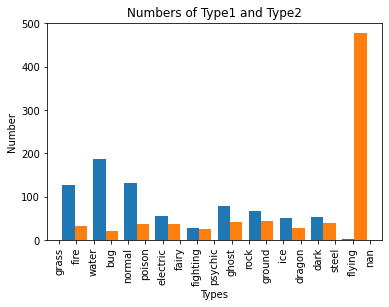

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

x=[df['type1'], df['type2'].astype(str)]

ax.hist(x)
ax.set_xlabel('Types') 
ax.set_ylabel('Number') 
ax.set_title('Numbers of Type1 and Type2') 

plt.xticks(rotation='vertical')

#ax.hist(df['type2'].astype(str))
#plt.xticks(df['type2'].astype(str), rotation='vertical')

plt.show()


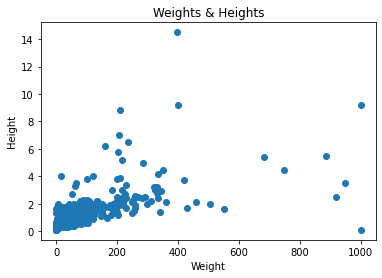

In [ ]:
fig,ax = plt.subplots()


ax.scatter(df['weight_kg'],df['height_m'])
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Weights & Heights')

plt.show()

<function matplotlib.pyplot.show>

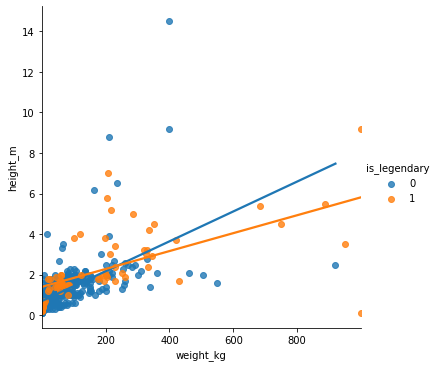

In [ ]:
sns.lmplot(data = df , x = 'weight_kg', y ="height_m", ci=None, hue = 'is_legendary')

plt.show

In [ ]:
import scipy.stats as st

_,p_val = st.ttest_ind(df['capture_rate'], df['weight_kg'])
print('P-Value is:',p_val)

P-Value is: 2.5989503458400436e-14


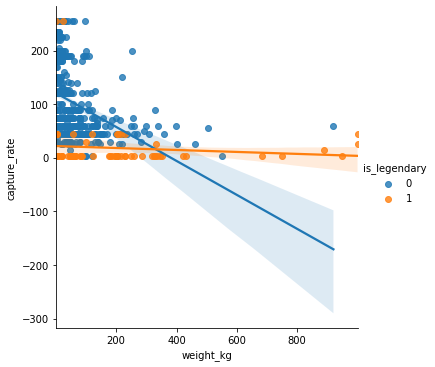

In [ ]:
sns.lmplot(data = df, y ='capture_rate', x = 'weight_kg', hue='is_legendary')
plt.show()

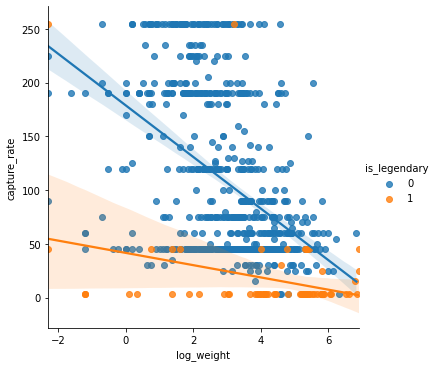

In [ ]:
df['log_cap'] = np.log(df['capture_rate'])
df['log_weight'] = np.log(df['weight_kg'])
df['log_height'] = np.log(df['height_m'])
sns.lmplot(data = df, y ='capture_rate', x = 'log_weight', hue='is_legendary')
plt.show()

In [ ]:
from scipy import stats
r_, p_val = stats.pearsonr(df['weight_kg'],df['capture_rate'])
print(r_)
print(p_val)

-0.3274526923755594
5.6277791769044774e-21


In [ ]:
from statsmodels.formula.api import ols

model = ols('capture_rate ~ weight_kg',data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     93.56
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.63e-21
Time:                        18:12:35   Log-Likelihood:                -4444.2
No. Observations:                 781   AIC:                             8892.
Df Residuals:                     779   BIC:                             8902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.9388      2.943     38.031      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model1 = ols('capture_rate ~ log_weight',data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.89e-43
Time:                        18:12:35   Log-Likelihood:                -4392.7
No. Observations:                 781   AIC:                             8789.
Df Residuals:                     779   BIC:                             8799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    169.9100      5.444     31.208      0.0

In [ ]:
_,p_val = st.ttest_ind(df['capture_rate'], df['height_m'])
print('P-Value is:',p_val)

P-Value is: 2.661271084804209e-204


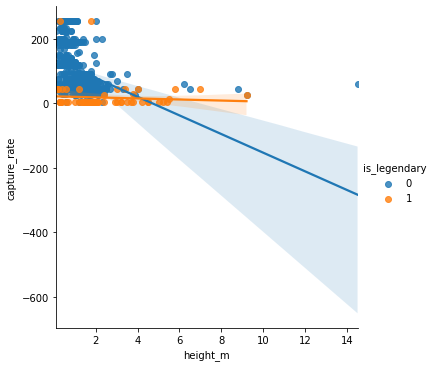

In [ ]:
sns.lmplot(data = df, y='capture_rate', x = 'height_m', hue='is_legendary')
plt.show()

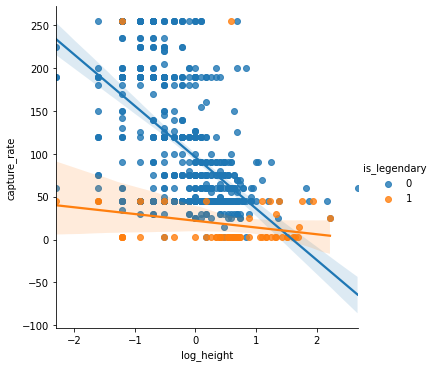

In [ ]:
sns.lmplot(data = df, y ='capture_rate', x = 'log_height', hue='is_legendary')
plt.show()

In [ ]:
r_, p_val = stats.pearsonr(df['height_m'],df['capture_rate'])
print(r_)
print(p_val)

-0.38340474744066977
9.419147568640666e-29


In [ ]:
model2 = ols('capture_rate ~ height_m',data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     134.2
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           9.42e-29
Time:                        18:12:57   Log-Likelihood:                -4426.4
No. Observations:                 781   AIC:                             8857.
Df Residuals:                     779   BIC:                             8866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.3300      3.689     35.063      0.0

In [ ]:
model3 = ols('capture_rate ~ log_height',data = df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     300.2
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           3.96e-57
Time:                        18:12:58   Log-Likelihood:                -4361.2
No. Observations:                 781   AIC:                             8726.
Df Residuals:                     779   BIC:                             8736.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.0269      2.333     39.443      0.0

In [ ]:
model4 = ols('capture_rate ~ log_weight + log_height',data = df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           6.76e-57
Time:                        18:12:58   Log-Likelihood:                -4358.7
No. Observations:                 781   AIC:                             8723.
Df Residuals:                     778   BIC:                             8737.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.0405      8.726     12.725      0.0

In [ ]:
model_base = ols('capture_rate ~ weight_kg + height_m',data = df).fit()
print(model_base.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     73.83
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           4.37e-30
Time:                        18:12:59   Log-Likelihood:                -4420.6
No. Observations:                 781   AIC:                             8847.
Df Residuals:                     778   BIC:                             8861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.0910      3.682     34.791      0.0

In [ ]:
df_no_leg = df[df['is_legendary'] == 0]
df_no_leg = df_no_leg.drop(columns='is_legendary')
df_no_leg.head()

,pokedex_number,name,classfication,type1,type2,base_total,attack,defense,hp,sp_attack,sp_defense,speed,height_m,weight_kg,base_happiness,base_egg_steps,experience_growth,capture_rate,generation,log_cap,log_weight,log_height
0,1,Bulbasaur,Seed Pokémon,grass,poison,318,49,49,45,65,65,45,0.7,6.9,70,5120,1059860,45,1,3.806662,1.931521,-0.356675
1,2,Ivysaur,Seed Pokémon,grass,poison,405,62,63,60,80,80,60,1.0,13.0,70,5120,1059860,45,1,3.806662,2.564949,0.000000
2,3,Venusaur,Seed Pokémon,grass,poison,625,100,123,80,122,120,80,2.0,100.0,70,5120,1059860,45,1,3.806662,4.605170,0.693147
3,4,Charmander,Lizard Pokémon,fire,NaN,309,52,43,39,60,50,65,0.6,8.5,70,5120,1059860,45,1,3.806662,2.140066,-0.510826
4,5,Charmeleon,Flame Pokémon,fire,NaN,405,64,58,58,80,65,80,1.1,19.0,70,5120,1059860,45,1,3.806662,2.944439,0.095310


<function matplotlib.pyplot.show>

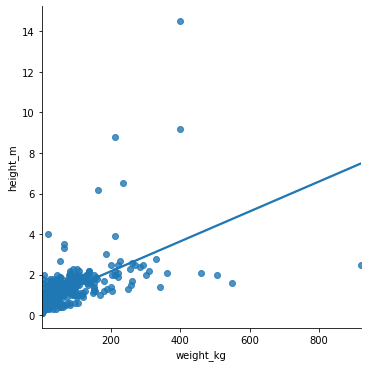

In [ ]:
sns.lmplot(data = df_no_leg , x = 'weight_kg', y ="height_m", ci=None)

plt.show

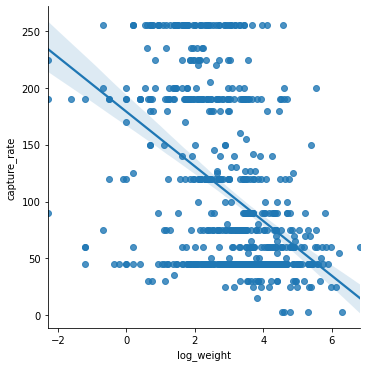

In [ ]:
sns.lmplot(data = df_no_leg, y ='capture_rate', x = 'log_weight')
plt.show()

In [ ]:
model_n1 = ols('capture_rate ~ log_weight ',data = df_no_leg).fit()
print(model_n1.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.33e-39
Time:                        18:13:02   Log-Likelihood:                -3985.5
No. Observations:                 712   AIC:                             7975.
Df Residuals:                     710   BIC:                             7984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    179.0877      5.777     31.000      0.0

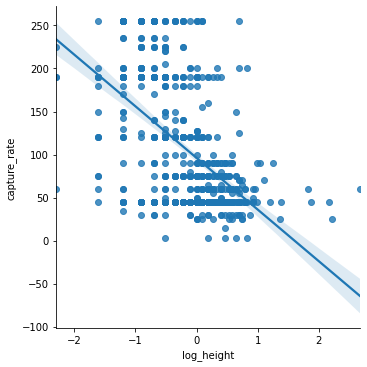

In [ ]:
sns.lmplot(data = df_no_leg, y ='capture_rate', x = 'log_height')
plt.show()

In [ ]:
model_n2 = ols('capture_rate ~ log_height',data = df_no_leg).fit()
print(model_n2.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     276.1
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.29e-52
Time:                        18:13:03   Log-Likelihood:                -3955.5
No. Observations:                 712   AIC:                             7915.
Df Residuals:                     710   BIC:                             7924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.0662      2.420     39.698      0.0

In [ ]:
model_n_combo = ols('capture_rate ~ log_height + log_weight',data = df_no_leg).fit()
print(model_n_combo.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     141.2
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           2.46e-52
Time:                        18:13:03   Log-Likelihood:                -3953.1
No. Observations:                 712   AIC:                             7912.
Df Residuals:                     709   BIC:                             7926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.0972      9.455     12.278      0.0

In [ ]:
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(pd.crosstab(index=df['capture_rate'], columns=df["base_total"]))

print('P-value is:', p)


P-value is: 3.515352675309412e-87


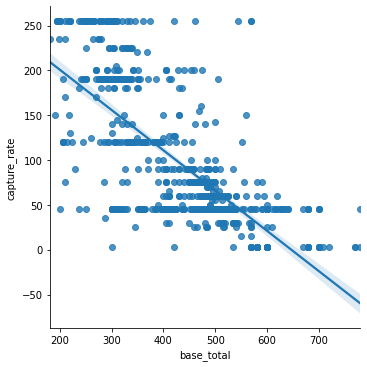

In [ ]:
sns.lmplot(data = df, y='capture_rate', x = 'base_total')
plt.show()

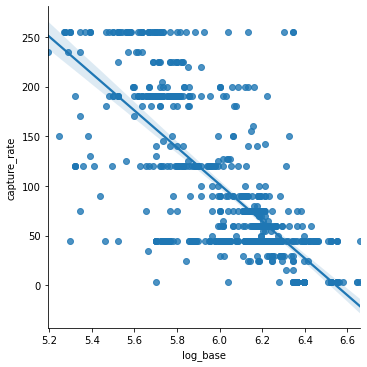

In [ ]:
df['log_base']=np.log(df['base_total'])
sns.lmplot(data = df, y='capture_rate', x = 'log_base')
plt.show()

In [ ]:
model5 = ols('capture_rate ~ log_base + log_height + log_weight'  ,data = df).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     286.5
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          3.38e-125
Time:                        18:13:10   Log-Likelihood:                -4197.6
No. Observations:                 781   AIC:                             8403.
Df Residuals:                     777   BIC:                             8422.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1126.7697     51.495     21.881      0.0

In [ ]:
model6 = ols('capture_rate ~ log_base' ,data = df).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:           capture_rate   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     843.5
Date:                Tue, 27 Apr 2021   Prob (F-statistic):          3.04e-126
Time:                        18:13:10   Log-Likelihood:                -4202.0
No. Observations:                 781   AIC:                             8408.
Df Residuals:                     779   BIC:                             8417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1217.0285     38.576     31.549      0.0